In [1]:
import numpy as np
import scipy.constants as cc

from tabulate import tabulate

import matplotlib.pyplot as plt

from RachbaJunction import RachbaJunction
from RachbaJunction.utilities import *
from RachbaJunction.ScatteringMatrix import ScatteringMatrix

ev_to_j = 1.602176634e-19

ModuleNotFoundError: No module named 'RachbaJunction'

In [10]:
#InAs
# m = 0.04*cc.m_e

#InSb
m = 0.015*cc.m_e

# h_xy = 0.3e-3*ev_to_j# mJ

h_xy = 0.05e-3# mJ
k_z = np.sqrt(2*m*h_xy*ev_to_j)/cc.hbar# 1/Metr
l_z = 1/k_z
print(f"k_z {k_z}") #1/Metr
print(f"l_z {l_z}m")
print(f"l_z {l_z*10**9:.2f}nm") #Metr


k_z 4436792.960074181
l_z 2.253880244128589e-07m
l_z 225.39nm


# Dirac dilemma

In [4]:
# k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr
# alp_r = 0.3e-3*ev_to_j/h_xy

# k_so = np.sqrt(alp_r)*k_z

# print(f"l_so {1/k_so}")
print(f"l_B {1/k_z}")

x = {"500nm": 500e-9, "100nm": 100e-9, "10nm": 10e-9, "0nm": 0}#, "l_B": 1/(k_z-0.001)}#Metr

print(f"x' {x}")

en = np.arange(-0.99, 2.5, 0.011)
# en = np.arange(-1.2, -0.8, 0.000011)

alp_r = 10
Eso_profile = [alp_r, 0.1, -alp_r]

x_profile = [-1, 1]


# ScatteringMatrix.unity_tol = 1e-10
junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile

trasmission_coeff_total = []

lbl = []


for a in x.keys():
#     print(a)
    trasmission_coeff_tmp = []
    lbl.append(f"{a}")
    junction.interface = [-k_z*x[a]/2, k_z*x[a]/2]
    print(f"{a}: {k_z*x[a]}")
    for i in en:
        S = junction.get_scattering_matrix(i)
        if not S.is_unitary:
            print(f"{a}:{x[a]}, {i} isn't unitary")
            trasmission_coeff_tmp.append(np.nan)
        else:
            trasmission_coeff_tmp.append(S.t_coef)
    trasmission_coeff_total.append(trasmission_coeff_tmp)
    


l_B 2.253880244128589e-07
x' {'500nm': 5e-07, '100nm': 1e-07, '10nm': 1e-08, '0nm': 0}
500nm: 2.2183964800370903
100nm: 0.44367929600741807
10nm: 0.04436792960074181
0nm: 0.0


<IPython.core.display.Javascript object>


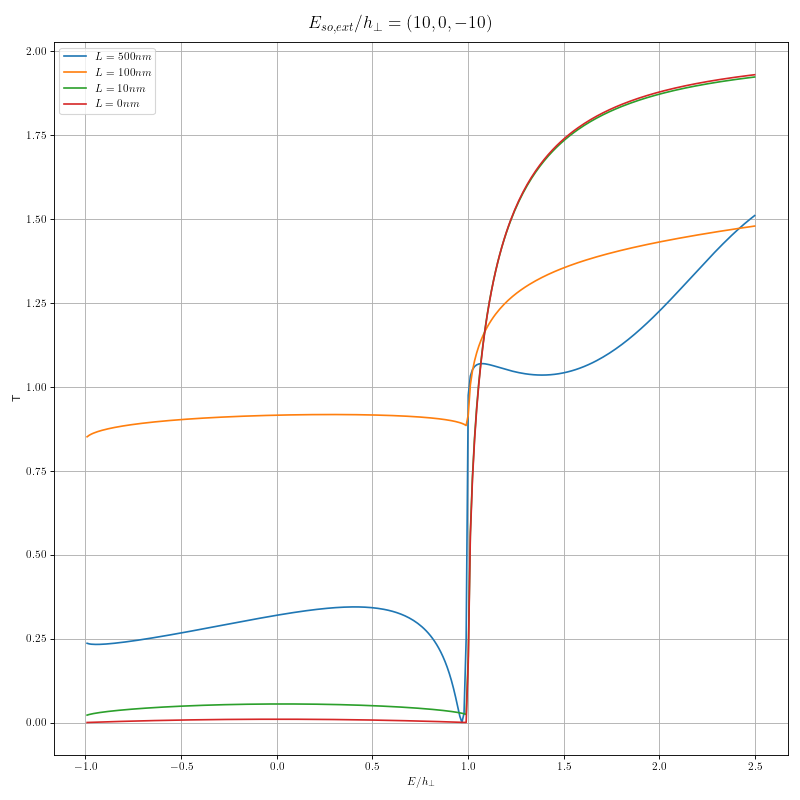

In [5]:
# %matplotlib inline
%matplotlib notebook
plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 1, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')


n = len(trasmission_coeff_total)
# j = 1
for i in range(n):
    axs.plot(en, trasmission_coeff_total[i], label=fr"$$ L = {lbl[i]}$$")
    axs.set_xlabel(r"$$E/ h_{\perp}$$")
    axs.set_ylabel("T")

axs.grid(True)#which='both')
axs.legend()
fig.suptitle(fr"$$E_{{so, ext}}/ h_\perp = ({alp_r}, 0, {-alp_r}) $$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()

## InSb

In [6]:
ee11 = 0

alp_r = 10


Eso_profile = [alp_r, 0, -alp_r]

x_profile = [-1, 1]


junction1 = RachbaJunction([x_profile, Eso_profile])

def trasmiission_vs_length1(ee, par):
    junction1.interface = [-par/2, par/2]
#     junction.alpha_profile = [par, 0, -par]
    S = junction1.get_scattering_matrix(ee)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {par}")
        return np.nan
    else:
        return S.t_coef


r = np.arange(-0.99, 1.8, 0.011)

# ll = np.array([0.578, 0.578+ np.pi, 0.578+ 2*np.pi, 0.578+ 3*np.pi])
ll = np.array([0.1, 2.4, 10])
lbl = {}
for i in ll:
    lbl[i] = f"{i*l_z*10**9:.2f}nm"
    
print(lbl)
res2 = make_grid(r, ll, [trasmiission_vs_length1])

{0.1: '22.54nm', 2.4: '540.93nm', 10.0: '2253.88nm'}


<IPython.core.display.Javascript object>


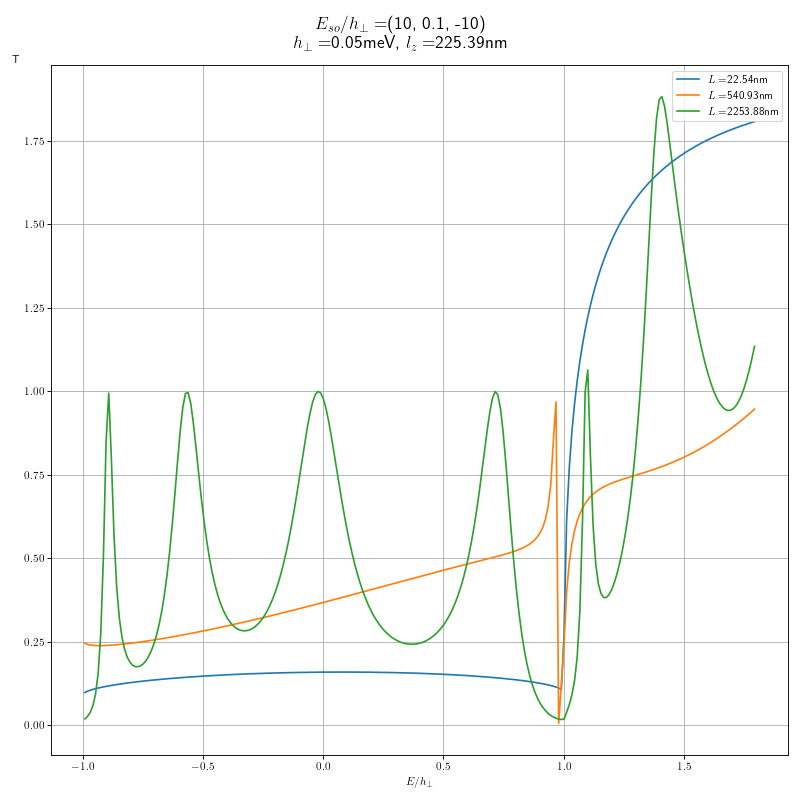

In [7]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for k in res2.keys():
    axs.plot(r, res2[k][0], label=r"$L = $"f"{lbl[k]}")

    axs.set_xlabel(r"$E/h_\perp$")
    axs.set_ylabel("T", loc = 'top', rotation=0)

fig.suptitle(r"$E_{so}/h_\perp = $"f"({junction[0]}, {junction[1]}, {junction[2]})""\n"r"$h_\perp = $"f"{h_xy*10**3}meV, "r"$l_z = $"f"{l_z*10**9:.2f}nm", fontsize=16)

axs.grid(True)
axs.legend()
             
plt.savefig("Trasmission coefficient(Dirac dilemma, 3 region, InSb).pdf", transparent = False)
plt.show()

## $T vs L$

In [8]:
# hh = 0.1e-3

# h_xy = hh*ev_to_j# mJ
# k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr
# alp_r = 0.3e-3*ev_to_j/h_xy

# k_so = np.sqrt(alp_r)*k_z

# print(f"l_so {1/k_so}")
print(f"l_B {1/k_z}")


ee11 = 0

Eso_profile = [alp_r, 0, -alp_r]

x_profile = [-1, 1]

junction = RachbaJunction([x_profile, Eso_profile])

def trasmiission_vs_length(ee, par):
    junction.interface = [-ee/2, ee/2]
    junction.alpha_profile = [par, 0, -par]
    S = junction.get_scattering_matrix(ee11)
    if not S.is_unitary:
        print(f"not unitary matrix length: {ee}, E_so: {parr}")
        return np.nan
    else:
        return S.t_coef

r = np.arange(0, 15, 0.01)
eso = [0.6, 3, 6, 10]
res = make_grid(r, eso, [trasmiission_vs_length])

l_B 2.253880244128589e-07


<IPython.core.display.Javascript object>


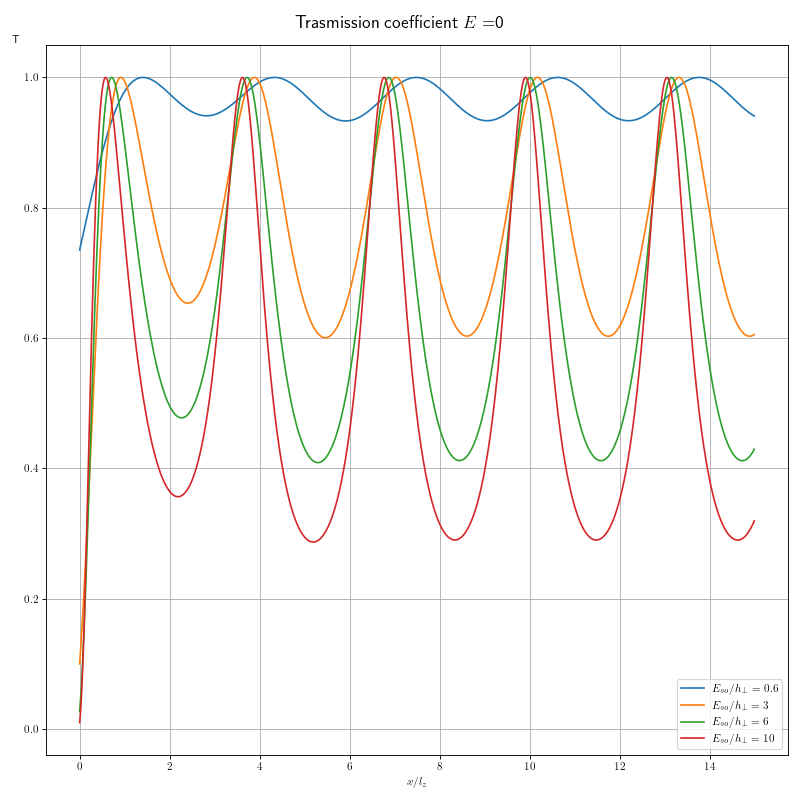

In [9]:
%matplotlib notebook
plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(1, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

for k in res.keys():
    axs.plot(r, res[k][0], label=fr"$$E_{{so}}/h_\perp = {k}$$")
    
#     axs[k[1] //2 -1 + k[1]%2 *2 , 0].set_title(fr"norm $c_{k[1]}$ "+f"\n {m}")
    axs.set_xlabel(r"$x/l_z$")
    axs.set_ylabel("T", loc = 'top', rotation=0)

#     axs[k[1] //2 -1 + k[1]%2 *2 , 1].set_title(fr"phase/$\pi$ $c_{k[1]}$ "+f"\n {m}")
#     axs[k[1] //2 -1 + k[1]%2 *2 , 1].set_xlabel(r"$E/h_\perp$")
#     axs[k[1] //2 -1 + k[1]%2 *2 , 1].set_ylabel(fr"$\angle c_{k[1]}/\pi$", loc = 'top', rotation=0)


fig.suptitle("Trasmission coefficient "r"$E =$"f"{ee11}", fontsize=16)

axs.grid(True)
axs.legend()
             
# plt.savefig("Trasmission coefficient(Rashba|Zeeman).pdf", transparent = False)
plt.show()

In [16]:
i = 10
# r = np.arange(0, 15, 0.001)
rr = np.array(res[i][0], dtype=np.float64)
mm = np.amax(rr)
print(mm)
# print(np.isclose(rr, np.full(rr.size, mm)))
# np.where(res[i] == mm)
m_pos = np.where(np.isclose(rr, mm, rtol= 1e-4))[0]
print(m_pos)
print(r[m_pos])

print(r[m_pos[0]])


0.9999996674282783
[  58  362  677  991 1305]
[ 0.58  3.62  6.77  9.91 13.05]
0.58


## hight $h_{\perp}/E_{so}$

In [47]:
hh = 0.001e-3

h_xy = hh*ev_to_j# mJ
k_z = np.sqrt(2*m*h_xy)/cc.hbar# 1/Metr

alp_r = 0.3e-3*ev_to_j/h_xy
# alp_r = 6
k_so = np.sqrt(alp_r)*k_z

print(f"l_so {1/k_so}")
print(f"l_B {1/k_z}")
print(f"ratio: (l_b/l_so)^2 = {(k_so/k_z)**2}")

x = {"500nm": 500e-9, "100nm": 100e-9, "10nm": 10e-9, "0nm": 0, "l_B": 1/(k_z-0.001)}

# k_z*np.array([500e-9, 100e-9, 10e-9, np.finfo(np.float64).eps])# Metr
print(f"x' {x}")

en = np.arange(-0.99, 4, 0.011)



# Eso_profile = [alp_r, np.finfo(np.float64).eps, -alp_r]
Eso_profile = [alp_r, 0, -alp_r]

x_profile = [-1, 1]


ScatteringMatrix.unity_tol = 1e-8
junction = RachbaJunction()

junction.interface = x_profile
junction.alpha_profile = Eso_profile

trasmission_coeff_total = []

lbl = []


for a in x.keys():
#     print(a)
    trasmission_coeff_tmp = []
    lbl.append(f"{a}")
    junction.interface = [-k_z*x[a]/2, k_z*x[a]/2]
    print(f"{a}: {k_z*x[a]}")
    for i in en:
        S = junction.get_scattering_matrix(i)
        if not S.is_unitary:
            print(f"{a}:{x[a]}, {i} isn't unitary")
            trasmission_coeff_tmp.append(np.nan)
        else:
            trasmission_coeff_tmp.append(S.t_coef)
        
    trasmission_coeff_total.append(trasmission_coeff_tmp)

l_so 9.201427565757706e-08
l_B 1.5937340046057164e-06
ratio: (l_b/l_so)^2 = 300.00000000000006
x' {'500nm': 5e-07, '100nm': 1e-07, '10nm': 1e-08, '0nm': 0, 'l_B': 1.5937340071457048e-06}
500nm: 0.31372863887891883
100nm: 0.06274572777578376
10nm: 0.006274572777578377
0nm: 0.0
l_B: 1.000000001593734


<IPython.core.display.Javascript object>


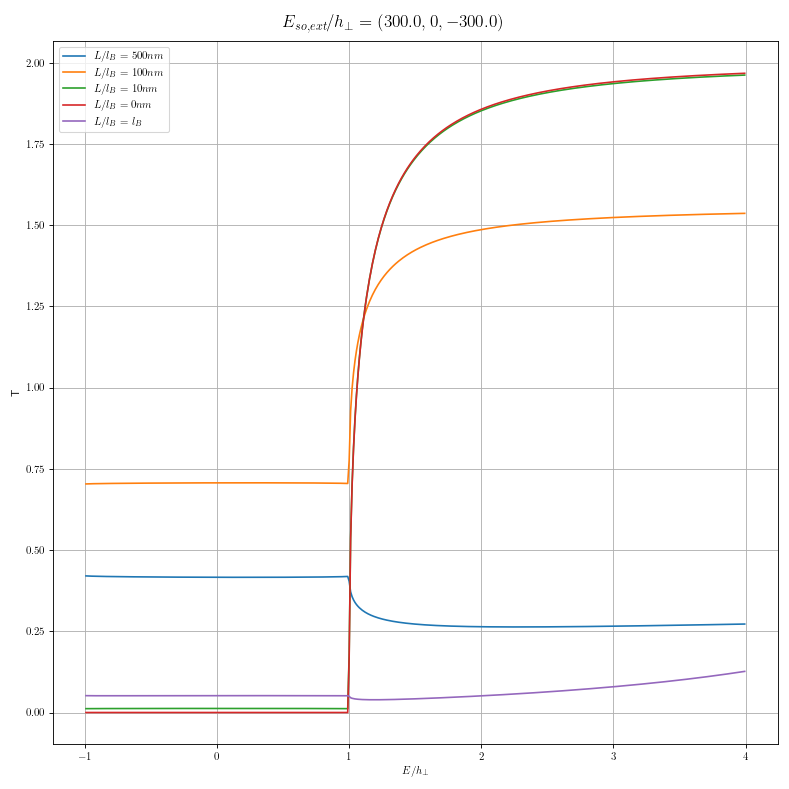

In [48]:
# %matplotlib inline
%matplotlib notebook
plt.rcParams['text.usetex'] = True


fig, axs = plt.subplots(1, 1, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

# for i in range(len(trasmission_coeff_total)):
# i = -1
# axs[0,0].plot(en, trasmission_coeff_total[i], label=fr"$$ L/l_{{B}} = {lbl[i]}$$")
# axs[0,0].set_xlabel(r"$$E/ h_{\perp}$$")
# axs[0,0].set_ylabel("T")

n = len(trasmission_coeff_total)
# j = 1
for i in range(n):
    axs.plot(en, trasmission_coeff_total[i], label=fr"$$ L/l_{{B}} = {lbl[i]}$$")
    axs.set_xlabel(r"$$E/ h_{\perp}$$")
    axs.set_ylabel("T")
    
#     if i != 0:
#         axs[i//2, i%2].plot(en, trasmission_coeff_total[j-1], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j-1]}$$")
#         axs[i//2, i%2].plot(en, trasmission_coeff_total[j], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j]}$$")
#         j += 2
    
# #     axs[i//2, i%2].set_title(fr"$$ E_{{SO, L}}/ h_{{\perp}} = {lbl[i]}$$")
#     axs[i//2, i%2].legend()
#     axs[i//2, i%2].grid(True)#which='both')
#     axs[i//2, i%2].set_xlabel(r"$$E/ h_{\perp}$$")
#     axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

axs.grid(True)#which='both')
axs.legend()
fig.suptitle(fr"$$E_{{so, ext}}/ h_\perp = ({alp_r}, 0, {-alp_r}) $$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()

<IPython.core.display.Javascript object>


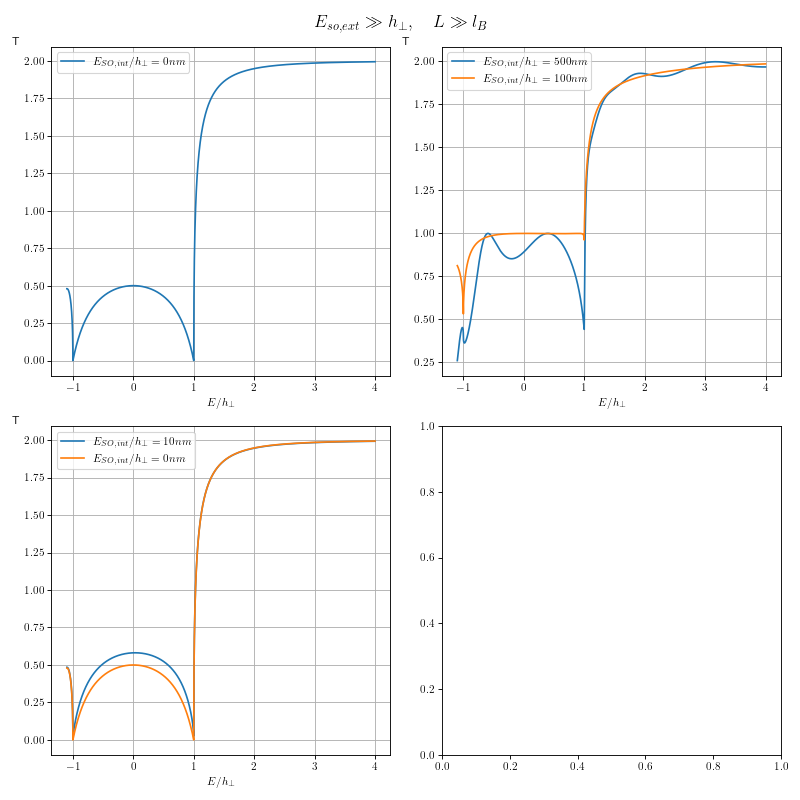

In [8]:
# %matplotlib inline
%matplotlib notebook

plt.rcParams['text.usetex'] = True

fig, axs = plt.subplots(2, 2, figsize=(10, 10), dpi=100, tight_layout=True, facecolor='white')

# for i in range(len(trasmission_coeff_total)):
i = -1
axs[0,0].plot(en, trasmission_coeff_total[i], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[i]}$$")
axs[0,0].set_xlabel(r"$$E_{SO, int}/ h_{\perp}$$")
axs[0,0].set_ylabel("T")

n = len(trasmission_coeff_total)
j = 1
for i in range(n//2+1):
    if i != 0:
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j-1], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j-1]}$$")
        axs[i//2, i%2].plot(en, trasmission_coeff_total[j], label=fr"$$ E_{{SO,int}}/ h_{{\perp}} = {lbl[j]}$$")
        j += 2
    
#     axs[i//2, i%2].set_title(fr"$$ E_{{SO, L}}/ h_{{\perp}} = {lbl[i]}$$")
    axs[i//2, i%2].legend()
    axs[i//2, i%2].grid(True)#which='both')
    axs[i//2, i%2].set_xlabel(r"$$E/ h_{\perp}$$")
    axs[i//2, i%2].set_ylabel("T", loc = 'top', rotation=0)

fig.suptitle(r"$$E_{so, ext} \gg h_\perp ,\quad L \gg l_B$$", fontsize=16)
      
# plt.savefig("T(E) at cconstant E_SO(3 regions).png", transparent = False)
plt.show()